
# Project: Investigating Brazilian Medical Appointments




## Introduction

### In this report, I am investigating a dataset that includes information about ~100k medical appointments in Brazil. I will be looking to answer several important questions in this analysis. 

### The first: Which characteristics make a person more likely to miss their appointment? 

#### This is an important question for the healthcare organization to understand to improve their efforts when comparing forecasted demand to actual demand. Ensuring that the organization is staffed appropriately is key in the business of healthcare as not having enough caregivers could be catastrophic to the care levels it can provide for it's patients. Whereas the salaries for healthcare professionals are expensive, and having too many caregivers could be very detrimental to the business in a financial aspect. Staffing as accurately as possible will be very important to maintaining the right level of care for patients while not overspending on caregiver compensation. 


### The second: Is our SMS reminder system effective and if so, is there a particular demographic of person that it is and is not effective for?

#### It is also important for the business to understand the impact of the sms reminder system. If it is not effective, the organization should explore ways to improve the reminder, or simply remove the sms reminder system and trim the costs associated with providing and supporting the process. It may be that the sms system is only impactful for certain age groups. Knowing this could help the organization limit their costs by only providing the service for select demographics. 


## Let's get started!


In [160]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



# Data Wrangling

#### Below cell reads in the csv file using pandas, and then displays the first 5 rows of data using the df.head() function.

In [161]:
df = pd.read_csv('noshowapts.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Below displays the dimensions of the dataframe. 110527 rows, and 14 columns. 

In [162]:
df.shape

(110527, 14)

#### Below lists the datatypes for each of the 14 columns

In [163]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### Below checks the columns previously identified having object datatypes to confirm the actual datatypes in those columns. 
#### Conclusion: The columns having object as data type are all strings, which is normal for pandas.
#### Note: The ScheduledDay and AppointmentDay appear as object/string datatypes and will need to be converted to datetime type. We will take care of that next.

In [164]:
print('Gender Data Type: {}'.format(type(df['Gender'][0])))
print('ScheduledDay Data Type: {}'.format(type(df['ScheduledDay'][0])))
print('AppointmentDay Data Type: {}'.format(type(df['AppointmentDay'][0])))
print('Neighbourhood Data Type: {}'.format(type(df['Neighbourhood'][0])))
print('No-show Data Type: {}'.format(type(df['No-show'][0])))


Gender Data Type: <class 'str'>
ScheduledDay Data Type: <class 'str'>
AppointmentDay Data Type: <class 'str'>
Neighbourhood Data Type: <class 'str'>
No-show Data Type: <class 'str'>


#### Below updates the ScheduledDay and AppointmentDay columns to the datetime type. 

In [165]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.tz_localize(None)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.tz_localize(None)

#### Below displays summary of the dataframe and how many non-null rows exist for each column.
#### Conclusion: There aren't any null rows in the dataframe. 
#### Note: The ScheduledDay & AppointmentDay columns are now of the datetime datatype.

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

#### Below displays the number of unique values for each of the columns.

#### The columns with 2 unique values are Yes or No columns. Meaning they do or do not have the chacteristic associated with the column name. 


In [167]:
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Below displays additional valuable statistics on each column. This only works for columns with numeric datatypes which is why some columns are missing. 

In [168]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Below checks the dataframe for duplicate values.
#### Conclusion: There are no duplicate rows.

In [169]:
sum(df.duplicated())

0

#### Below renames the 'Neighborhood' and 'Scholarship' columns to 'Location' and 'Welfare' respectively. This is done to make it clear for people consuming the report as the original names may be confusing. 

In [170]:
df.rename(columns = {'Neighbourhood': 'Location', 'Scholarship': 'Welfare'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Location,Welfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Below cell drops the PatientId,  AppointmentID, and ScheduledDay columns as those will not be needed for analysis. 

In [171]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay'], axis = 1, inplace = True)
df.head()

,Gender,AppointmentDay,Age,Location,Welfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Below creates a new column splitting the age into 4 categories. 

In [172]:
def f(row):
    if row['Age'] >= 75:
        group = "75+"
    elif row['Age'] < 25:
        group = "Under 25"
    elif row['Age'] >= 25 and row['Age'] <50:
        group = "25 - 49"
    else:
        group = "50 - 74"
    return group

df['age_group'] = df.apply(f, axis=1)
df.head()

,Gender,AppointmentDay,Age,Location,Welfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_group
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,50 - 74
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50 - 74
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,50 - 74
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Under 25
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50 - 74


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which characteristics make a person more likely to miss their appointment?
#### This question is important for the healthcare business to understand which characteristics make a person more likely to miss an appointment. The insights and knowledge gained here will be useful to more accurately plan for demand. 

#### First, let us look at the % of appointments that are missed.  

#### Conclusion: ~ 20% of all appointments are missed. 


In [173]:
df['No-show'].value_counts(normalize = True)*100

No     79.806744
Yes    20.193256
Name: No-show, dtype: float64

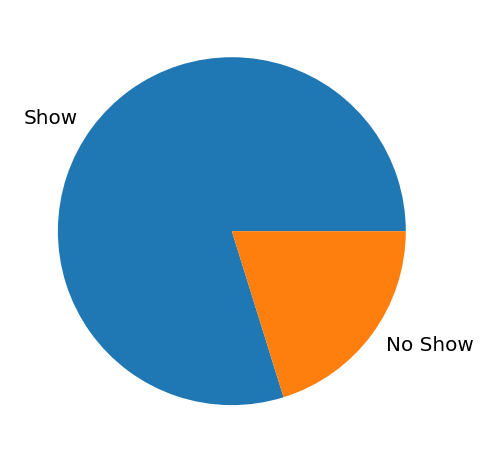

In [174]:
#Creates simple pie-chart visualizing the % of missed appointments overall.
y = np.array(df['No-show'].value_counts())

pielabels = ['Show', 'No Show']

plt.pie(y, labels = pielabels);

#### Next, let's see if we can find any trends amongst those who missed appointments. To do this, we will first create 2  new dataframes splitting apart those who missed the appointment and those who did not miss. The below cells split the data and verify that the split was accurate. 

In [175]:
df.rename(columns = {'No-show': 'No_show'}, inplace = True)

df_show = df.query('No_show == "No"')
df_no_show = df.query('No_show == "Yes"')

In [176]:
df_show.head()

,Gender,AppointmentDay,Age,Location,Welfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,age_group
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,50 - 74
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50 - 74
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,50 - 74
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Under 25
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50 - 74


In [177]:
#displays unique values by column. This is done to show that the 'No_show' column only has 1 value in this new dataframe. 
df_show.nunique()

Gender              2
AppointmentDay     27
Age               104
Location           80
Welfare             2
Hipertension        2
Diabetes            2
Alcoholism          2
Handcap             5
SMS_received        2
No_show             1
age_group           4
dtype: int64

In [178]:
df_no_show.head()

,Gender,AppointmentDay,Age,Location,Welfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,age_group
6,F,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Under 25
7,F,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,25 - 49
11,M,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,25 - 49
17,F,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,25 - 49
20,F,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,25 - 49


In [179]:
#Just like we did for the df_show dataframe, this displays unique values by column in the df_no_show dataframe. 
#This is done to show that the 'No_show' column only has 1 value in this new dataframe. 

df_no_show.nunique()

Gender              2
AppointmentDay     27
Age               100
Location           80
Welfare             2
Hipertension        2
Diabetes            2
Alcoholism          2
Handcap             5
SMS_received        2
No_show             1
age_group           4
dtype: int64

In [180]:
#Verifying the shape of the new dataframe
df_no_show.shape

(22319, 12)

In [181]:
#Verifying the shape of the new dataframe and ensuring that all the rows from the df dataframe are accounted for.
df_show.shape

(88208, 12)

# In the coming cells, we will begin analyzing individual characteristics and looking for correlations between those characteristics and no-show occurences.

## Below we begin analyzing the gender to look for correlations between women and men missing appointments.


Text(0, 0.5, 'Proportions')

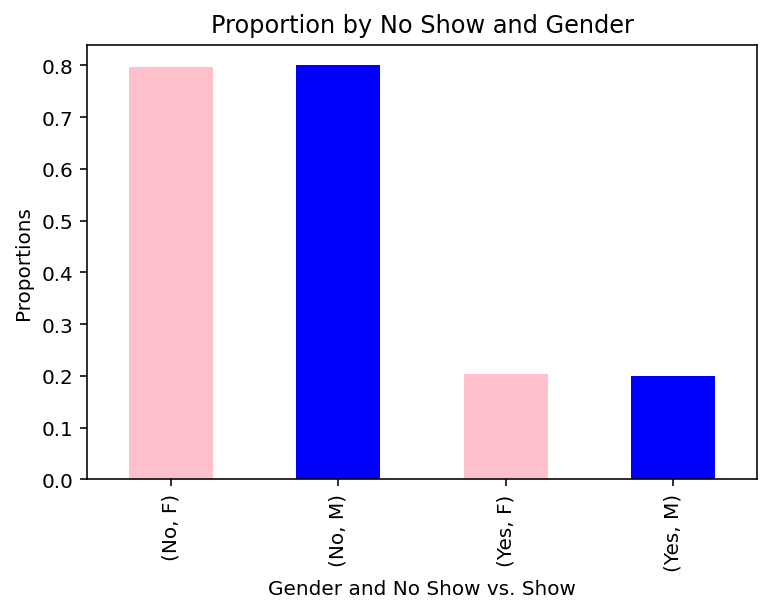

In [182]:
#Creating the logic and formatting for the Proportion by No Show and Gender visualization.

colors = ['pink', 'blue']
counts = df.groupby(['No_show', 'Gender']).count()['Age']
totals = df.groupby('Gender').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title = 'Proportion by No Show and Gender', color = colors)
plt.xlabel('Gender and No Show vs. Show')
plt.ylabel('Proportions')

#### The above visualization shows the proportion of women and men that showed up for, and did not show up for their appointments. Based on this chart, it appears that both women and men miss their appointments at an equal rate. 

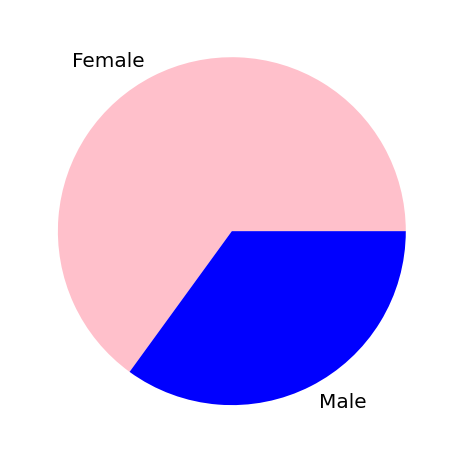

In [183]:
#Creates a very simple pie chart to demonstrate the number of appointments for women vs men.
glabels = ['Female', 'Male']
plt.pie(totals, labels = glabels, colors = colors);

#### The piechart above shows that women account for a substially higher number of medical appointments in this dataset. This is helpful to understand the demographics that the organization is treating. 

## Next, we will look at age to understand how this impacts the rate at which people miss their appointments. We will do this by using the age_group and age columns. 



Text(0.5, 1.0, 'Age Distribution')

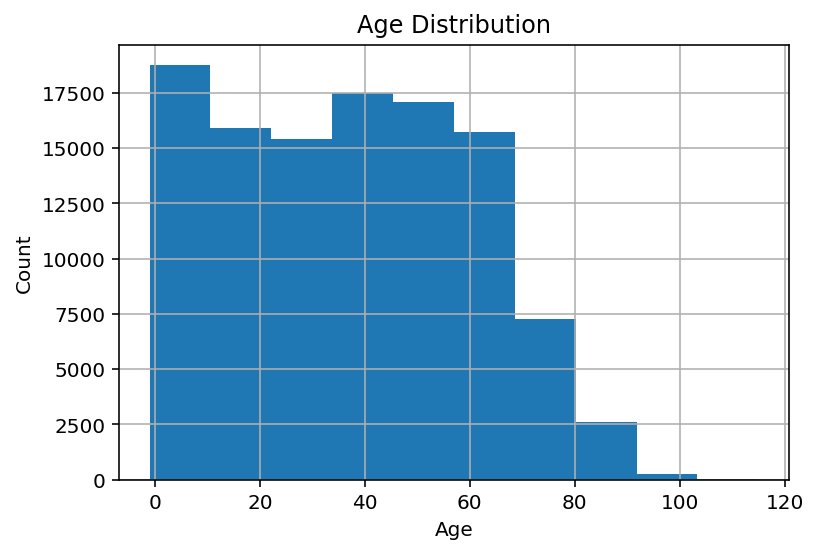

In [184]:
#Creates simple histogram giving a snapshot of the distribution of patient ages. 

ax = df['Age'].hist();
ax.set_ylabel('Count')
ax.set_xlabel('Age')
ax.set_title('Age Distribution')


#### Based on the histogram above, most of the patients scheduled are between the ages of 0 - 70. We will want to keep this in mind when analyzing the number of appointments missed by age. 

Text(0, 0.5, 'Proportions')

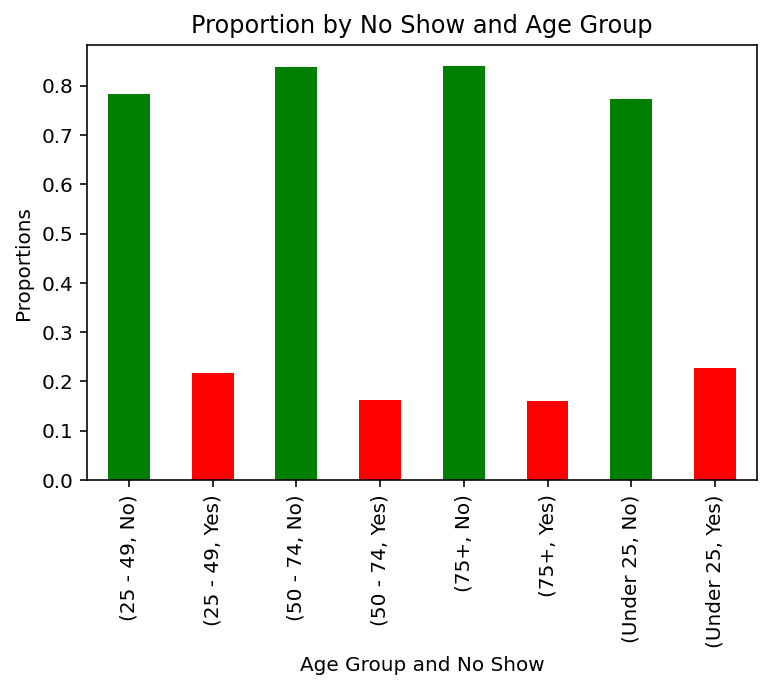

In [185]:
# creates bar chart using groupby and proportions.

colors = ['green', 'red']
counts = df.groupby(['age_group','No_show']).count()['Age']
totals = df.groupby('age_group').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title = 'Proportion by No Show and Age Group', color = colors)
plt.xlabel('Age Group and No Show')
plt.ylabel('Proportions')


#### The bar chart above is split out by age_group and whether or not a person made it to their appointment. Based on the chart, you can see that the age groups with the highest no-show rate are people under 25, and people between 25 - 49. This group makes up the majority of our patient population as shown in the histogram from earlier in this analysis. 

In [186]:
proportions*100

age_group  No_show
25 - 49    No         78.370096
           Yes        21.629904
50 - 74    No         83.707395
           Yes        16.292605
75+        No         83.979111
           Yes        16.020889
Under 25   No         77.283460
           Yes        22.716540
Name: Age, dtype: float64

#### The series above gives a textual breakdown of the 'Age Group and No Show' bar chart from the cell previous to it. It is interesting to see an ~5% difference in the no-show rate between the younger demographic (Under 50) and older demographic (50+). We should note that age may be linked to missing appointments and should be statistically investigated to look for causation. 

## Next we will dive into a person's welfare status to see if there are any correlations between that and missing appointments. 



Text(0, 0.5, 'Proportions')

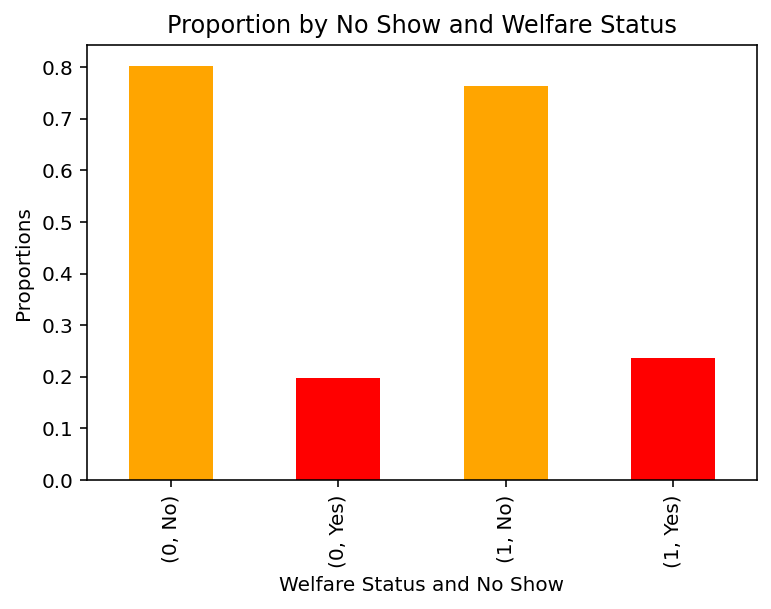

In [187]:
#Creates proportionate bar chart using group by.

colors = ['Orange', 'red']
counts = df.groupby(['Welfare','No_show']).count()['Age']
totals = df.groupby('Welfare').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title = 'Proportion by No Show and Welfare Status', color = colors)
plt.xlabel('Welfare Status and No Show')
plt.ylabel('Proportions')

#### The bar chart above shows a slightly higher number of occurences of missing an appointment for those who are on welfare. This can be used to help us calculate actual demand for appointments vs those scheduled. 

In [188]:
proportions*100

Welfare  No_show
0        No         80.192844
         Yes        19.807156
1        No         76.263696
         Yes        23.736304
Name: Age, dtype: float64

#### The above cell is a textual representation of the 'Welfare Status and No Show' bar chart. You can see that people on welfare are almost missing appointments 4% more than those not on welfare. We should note from this information that welfare status should also be investigated further statistically as it may be linked to a higher rate of missing appointments. 

## Next we will look for correlations between those with alcoholism and missed appointments.

Text(0, 0.5, 'Proportions')

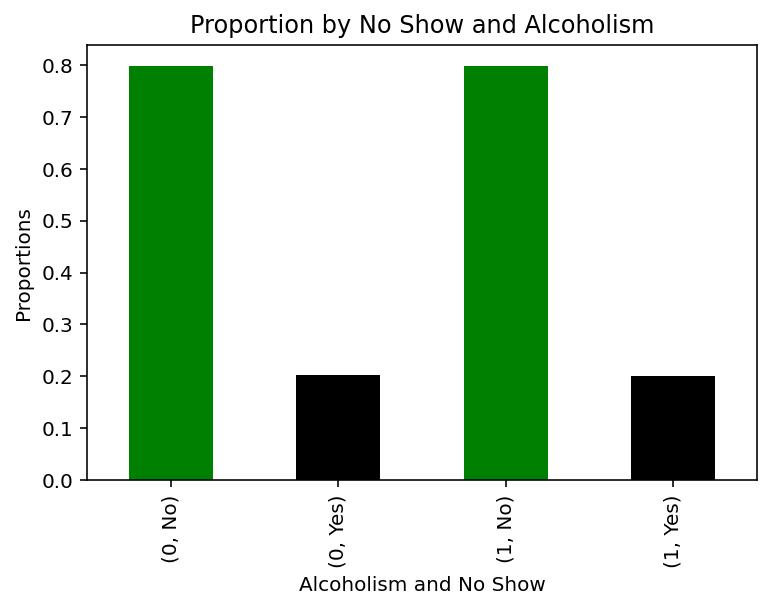

In [189]:
#Creates proportionate bar chart grouping by Alcoholism and No_show columns.

colors = ['Green', 'Black']
counts = df.groupby(['Alcoholism','No_show']).count()['Age']
totals = df.groupby('Alcoholism').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title = 'Proportion by No Show and Alcoholism', color = colors)
plt.xlabel('Alcoholism and No Show')
plt.ylabel('Proportions')

#### The bar chart above appears to show no correlation between alcoholism and missed appointments. 

In [190]:
proportions*100

Alcoholism  No_show
0           No         79.805351
            Yes        20.194649
1           No         79.851190
            Yes        20.148810
Name: Age, dtype: float64

#### The textual representation above shows that the % of alcoholics and non-alcoholics missing appointments is almost identical. We may not need to take alcoholism into consideration when planning for actual demand. 

## Finally, we will analyze the handicapped individuals to see if there is any correlation between certain disabilities and missing appointments.



Text(0, 0.5, 'Proportions')

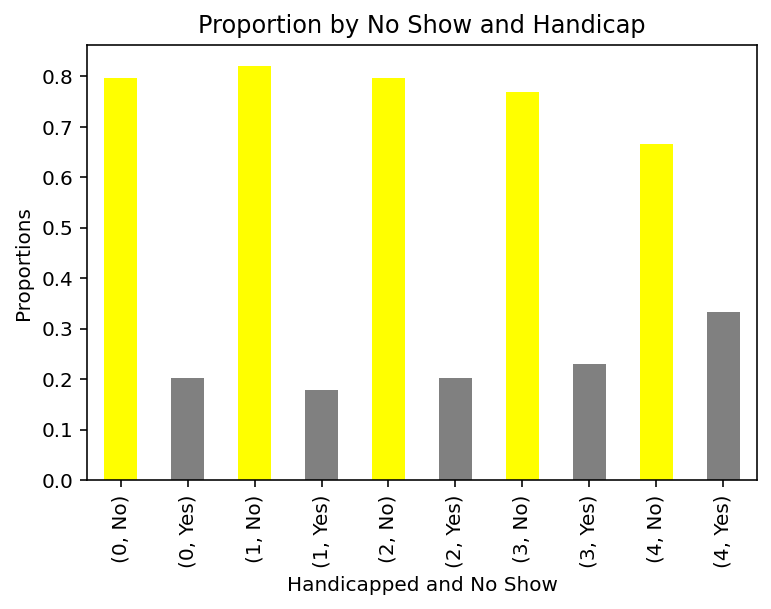

In [191]:
#Creates proportionate bar chart grouping by Handicap and No_show columns.

colors = ['Yellow', 'Gray']
counts = df.groupby(['Handcap', 'No_show']).count()['Age']
totals = df.groupby('Handcap').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title = 'Proportion by No Show and Handicap', color = colors)
plt.xlabel('Handicapped and No Show')
plt.ylabel('Proportions')

#### The chart above shows that those without a handicap (handcap = 0) are very similar in liklihood to miss an upcoming appointment as those with disabilities 1, 2, and 3 (handcaps 1,2,3). This representation also shows that those with disability 4 (handcap = 4) are missing appointments significantly more often than those with other handicaps, or without having any handicaps.

In [192]:
proportions*100

Handcap  No_show
0        No         79.764697
         Yes        20.235303
1        No         82.076396
         Yes        17.923604
2        No         79.781421
         Yes        20.218579
3        No         76.923077
         Yes        23.076923
4        No         66.666667
         Yes        33.333333
Name: Age, dtype: float64

#### The textual representation above shows that those without disability, and those with disabilities 1, 2, and 3 miss appointments ~20% of the time.. It also shows that individuals with disability 4  have a much higher % of missing their appointment at ~33% according to this dataset. We should note this disability as needing further exploration statistically to explore causation between it and missing appointments. 

## In the below cells, we will be looking into the date of the appointment to see if there is any correlation between date and the amount of people missing appointments.

In [193]:
#Finding the last day in the dataset
df['AppointmentDay'].max()


Timestamp('2016-06-08 00:00:00')

#### Above, I am finding the last day in the dataset to help me understand the upper limit to be used in breaking the data into blocks later. 

In [194]:
#Finding the first day in the dataset
df['AppointmentDay'].min()


Timestamp('2016-04-29 00:00:00')

#### Above, I am finding the first day in the dataset to help me in creating date blocks later.

In [195]:
#Finding total # of days in the dataset. 
df['AppointmentDay'].max() - df['AppointmentDay'].min()

Timedelta('40 days 00:00:00')

#### Above I am checking for the number of total days in the dataset. This is to guide me in splitting the days into blocks later. 

In [196]:
#Creating 4 new datasets representative of 10 day blocks.
df_10 = df.query('AppointmentDay <= "2016-05-07"')
df_20 = df.query('AppointmentDay > "2016-05-07" and AppointmentDay <= "2016-05-17"')
df_30 = df.query('AppointmentDay > "2016-05-17" and AppointmentDay <= "2016-05-28"')
df_40 = df.query('AppointmentDay > "2016-05-28"')
df_40.count()['Age'] + df_30.count()['Age']+ df_20.count()['Age'] + + df_10.count()['Age']

110527

#### Above, I create 4 new dataframes by splitting the data by 10 day blocks. I then run a calculation at the end to make sure my dataframes include all of the data in the dataset. 

In [197]:
#Creating variables for each of the value counts to be used in an array later for plotting. 

show_x_10 = df_10['No_show'].value_counts()[0]
noshow_x_10 = df_10['No_show'].value_counts()[1]
x_10 = df_10.count()['Age']

show_x_20 = df_20['No_show'].value_counts()[0]
noshow_x_20 = df_20['No_show'].value_counts()[1]
x_20 = df_20.count()['Age']

show_x_30 = df_30['No_show'].value_counts()[0]
noshow_x_30 = df_30['No_show'].value_counts()[1]
x_30 = df_30.count()['Age']

show_x_40 = df_40['No_show'].value_counts()[0]
noshow_x_40 = df_40['No_show'].value_counts()[1]
x_40 = df_40.count()['Age']


#### The above cell is used to create 3 variables from the 4 date block dataframes created previously. These variables will be used to create arrays for the purpose of plotting a visualization in the next cell.

In [198]:
#Creating 3 arrays using Numpy to store values for line chart visualization.

show_array = np.array([show_x_10,show_x_20,show_x_30,show_x_40])
no_show_array = np.array([noshow_x_10,noshow_x_20,noshow_x_30,noshow_x_40])
total_array = np.array([x_10,x_20,x_30,x_40])



#### Above, I create 3 arrays using the variables created on the date block dataframes. These will be used to create a visualization in the next cell.

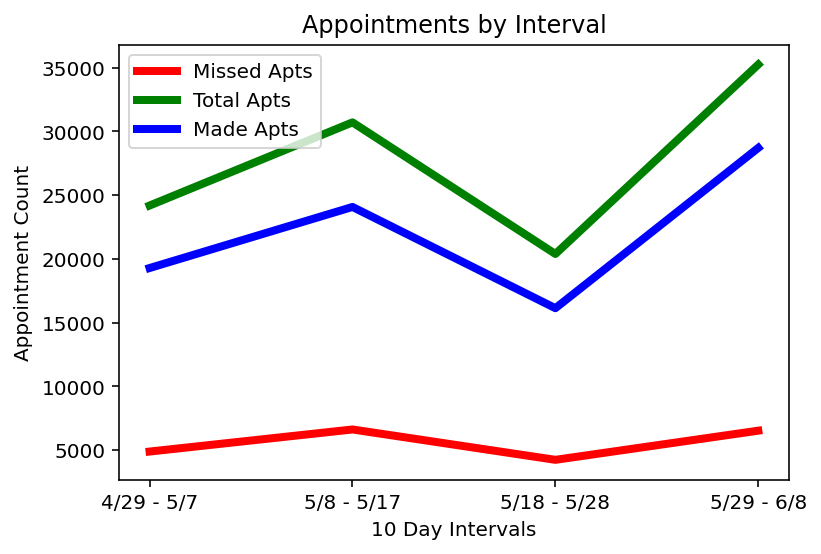

In [199]:
#Creates and formats lineplot of the arrays created in the previous cell.

plt.plot(no_show_array, linewidth = '4', c = 'red', label = 'Missed Apts');
plt.plot(total_array, linewidth = '4', c = 'green', label = 'Total Apts');
plt.plot(show_array, linewidth = '4', c = 'blue', label = 'Made Apts');
plt.xlabel('10 Day Intervals');
plt.ylabel('Appointment Count');
plt.title('Appointments by Interval');
plt.legend();
plt.xticks([0,1,2,3], ["4/29 - 5/7", "5/8 - 5/17", "5/18 - 5/28", "5/29 - 6/8"]);

In [200]:
print(no_show_array)
print(total_array)

[4900 6631 4251 6537]
[24187 30707 20389 35244]


#### Above plot displays the number of total appointments, made appointments, and missed appointments split up into 10 day blocks to help us see if there are any trends in when people are missing appointments. Based on the visualization, it appears that people missing appointments closely follows the number of total appointments. However, it is interesting to note that the number of missed appointments stays between 4 - 6k, even though the variation between number of total appointments is much higher. We should note that further statistical analysis will be needed to investigate this to determine causation/correlation. 

# Research Question 2 : Is our SMS reminder system effective and if so, is there a particular demographic of person that it is and is not effective for?

## Below we are looking into the impact that receiving an SMS reminder has on the liklihood to miss an appointment.

Text(0, 0.5, 'Proportions')

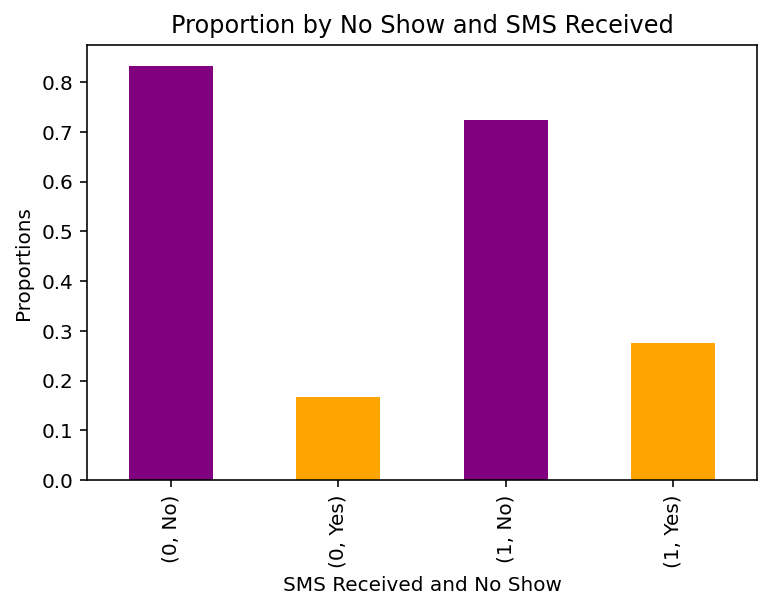

In [201]:
#Creates proportionate bar chart grouping by SMS_received and No_show columns.
colors = ['Purple', 'Orange']
counts = df.groupby(['SMS_received', 'No_show']).count()['Age']
totals = df.groupby('SMS_received').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title = 'Proportion by No Show and SMS Received', color = colors)
plt.xlabel('SMS Received and No Show')
plt.ylabel('Proportions')

#### Interestingly, the chart above shows us that those who received an SMS reminder missed their appointment at a higher rate than those who did not receive the reminder..

In [202]:
proportions*100

SMS_received  No_show
0             No         83.296689
              Yes        16.703311
1             No         72.425455
              Yes        27.574545
Name: Age, dtype: float64

#### The textual representation above shows that those who did receive the sms reminder missed their appointments ~11% more than those who didn't receive the reminder.

In [203]:
#Creates 4 new dataframes for the purpose of comparing age groups against sms_reminders. 
df_under25 = df.query('age_group == "Under 25"')
df_25to49 = df.query('age_group == "25 - 49"')
df_50to74 = df.query('age_group == "50 - 74"')
df_75u = df.query('age_group == "75+"')


df_50to74.head()

,Gender,AppointmentDay,Age,Location,Welfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,age_group
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,50 - 74
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50 - 74
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,50 - 74
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50 - 74
14,F,2016-04-29,54,NOVA PALESTINA,0,0,0,0,0,0,No,50 - 74


## Below we are looking at the proportions of people who missed an appointment and did/didn't recieve the sms_reminder for the under 25 age group.

Text(0, 0.5, 'Proportions')

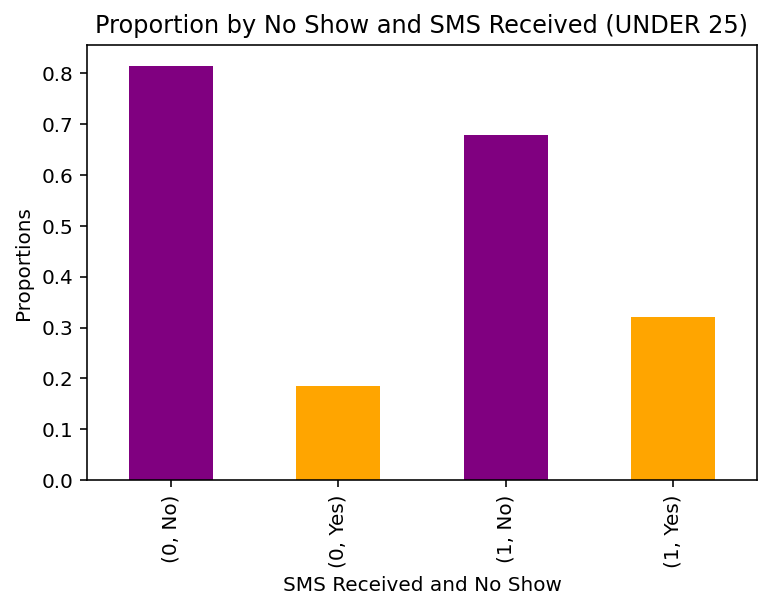

In [204]:
##Creates proportionate bar chart grouping by SMS_received and No_show columns applied to the df_under25 dataframe.
colors = ['Purple', 'Orange']
counts = df_under25.groupby(['SMS_received', 'No_show']).count()['Age']
totals = df_under25.groupby('SMS_received').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title = 'Proportion by No Show and SMS Received (UNDER 25)', color = colors)
plt.xlabel('SMS Received and No Show')
plt.ylabel('Proportions')

#### The chart above shows that those in the under 25 group that did receive the reminder missed their appointments at a higher rate than those who didn't receive the reminder.

In [205]:
proportions*100

SMS_received  No_show
0             No         81.442980
              Yes        18.557020
1             No         67.834255
              Yes        32.165745
Name: Age, dtype: float64

#### Textual represetation above shows that those in the under 25 age group missed appointments ~14% more than those who didn't receive the reminder.

## Next, we will look at at the proportions of people who missed an appointment and did/didn't recieve the sms_reminder for 25 - 49 age group.

Text(0, 0.5, 'Proportions')

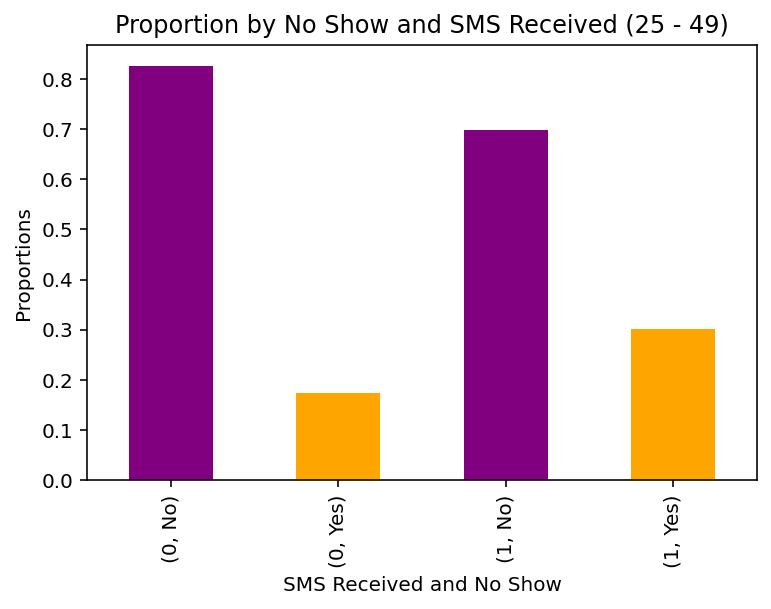

In [206]:
colors = ['Purple', 'Orange']
counts = df_25to49.groupby(['SMS_received', 'No_show']).count()['Age']
totals = df_25to49.groupby('SMS_received').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title = 'Proportion by No Show and SMS Received (25 - 49)', color = colors)
plt.xlabel('SMS Received and No Show')
plt.ylabel('Proportions')

#### Once again, the chart shows that those who received the reminder missed their appointments more than those who didn't receive it. 

In [207]:
proportions*100

SMS_received  No_show
0             No         82.607254
              Yes        17.392746
1             No         69.920648
              Yes        30.079352
Name: Age, dtype: float64

#### The textual representation above shows that those aged 25-49 who received the reminder missed their appointments ~13% more often than those who didn't receive the reminder. 

## Below we move on to the 50 - 74 age group looking at how the sms reminder impacts the liklihood that they show up for their appointment.

Text(0, 0.5, 'Proportions')

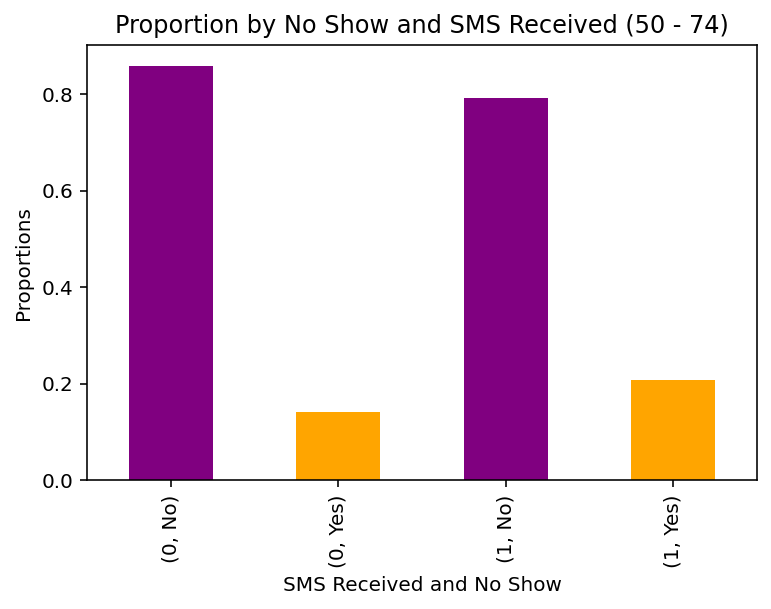

In [208]:
colors = ['Purple', 'Orange']
counts = df_50to74.groupby(['SMS_received', 'No_show']).count()['Age']
totals = df_50to74.groupby('SMS_received').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title = 'Proportion by No Show and SMS Received (50 - 74)', color = colors)
plt.xlabel('SMS Received and No Show')
plt.ylabel('Proportions')

#### Not suprisingly, those who received the reminder missed their appointments more often than those who did not receive the reminder. 

In [209]:
proportions*100

SMS_received  No_show
0             No         85.891196
              Yes        14.108804
1             No         79.327341
              Yes        20.672659
Name: Age, dtype: float64

#### Textual representation above shows a slightly better impact from the sms reminder. Only 6% more people who did receive the reminder missed their appointment when compared to those who didn't receive the reminder. 

## Finally, we analyze the 75+ age group looking at the relationship between receiving the reminder and missing their appointment.

Text(0, 0.5, 'Proportions')

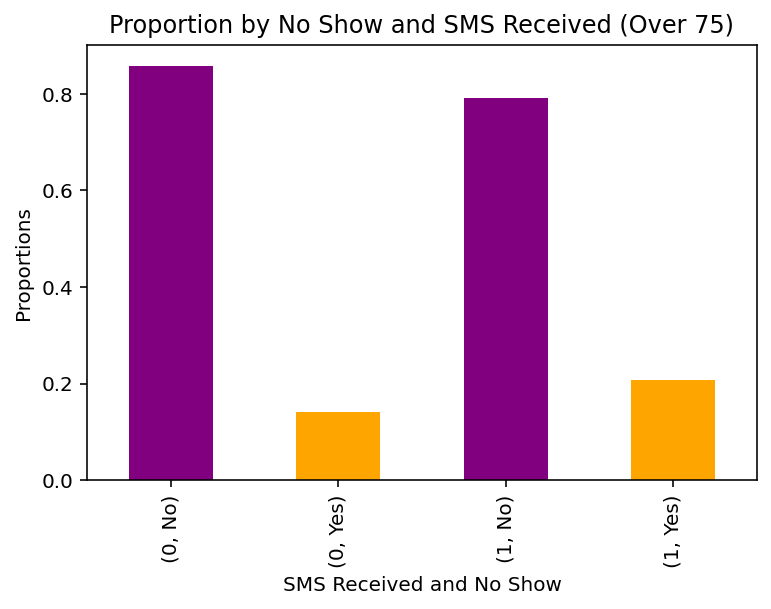

In [210]:
colors = ['Purple', 'Orange']
counts = df_75u.groupby(['SMS_received', 'No_show']).count()['Age']
totals = df_75u.groupby('SMS_received').count()['Age']
proportions = counts / totals
proportions.plot(kind='bar', title = 'Proportion by No Show and SMS Received (Over 75)', color = colors)
plt.xlabel('SMS Received and No Show')
plt.ylabel('Proportions')

#### Again here, those who received the reminder do not show up for their appointments as often as those who did not receive the reminder.

In [211]:
proportions*100

SMS_received  No_show
0             No         85.804196
              Yes        14.195804
1             No         79.222357
              Yes        20.777643
Name: Age, dtype: float64

In [212]:
df.shape

(110527, 12)

#### The textual representation shows those who didn't receive the reminder attended their appointments ~6% more than those who didn't receive the reminder. 

## Conclusions

In this report, we analyzed 110,527 data samples from hospital visits in Brazil. The samples were gathered from 40 days of appointments between 4/29 and 6/8 of 2016. Our goal for this report was to look for information to help us answer the following questions. 
 
### Research Question 1: Which characteristics make a person more likely to miss their appointment?

#### To help us answer this question, we selected several of the most interesting characteristics of each sample to analyze looking for potential correlations. We analyzed Gender, Age, Welfare Status, Alcoholism Status, Handicap Status, and Appointment Date in search for interesting observations. Although we did uncover some pretty interesting facts, this report does not leverage the statistical analysis needed to determine causation for correlation between any of these factors. Additional statistal analysis will need to be undertaken in order to investigate the observations noted in this report. However, those statiscal analysis' are out of scope for this project.

#### In regards to Gender, we did not uncover any interesting observations. Our analysis shows that men and women missed their appointments at the same rate. 

#### When looking into Age, we were able to see that people under 50 missed appointments more often than those over 50. It would be important to conduct further statistical analysis to explore the link between age and missing appointments.

#### For Welfare Status, we found that more often, people on Welfare missed appointments than those who were not on Welfare. It would certainly benefit us to conduct further statistical analysis here in order to determine if there is indeed correlation.

#### After exploring the data for Alcoholics, it appears from our analysis that alcoholics and non-alcoholics missed appointments at the same rate. Based on this, we may not need to explore for any causation using statistical analysis.

#### In looking at Handicap Status, we found that people with handicap status 4 missed appointments more often than those with any other handicap. We observed that those without handicap and those with handicaps 1, 2, and 3 missed appointments at approximately the same rate. It would be interesting to explore the causation/correlation between handicap status 4 and missing appointments using statistical analysis. 

#### Finally, when analyzing the data split up into 10 day periods, it appears to us from the data that the number of appointments missed closely follows the number of total appointments during each period. We also observed that the number of appointments missed in each of the 10 day blocks stayed between 4 - 6 thousand, even though in some periods, the variation in the number of total appointments was much higher. It would be important to explore this further using statistical analysis before determining if the date has any correlation to people missing appointments.  


### Research Question 2 : Is our SMS reminder system effective and if so, is there a particular demographic of person that it is and is not effective for?

#### To help us answer this question, we took the total number of people received the SMS reminder and compared it to the total number of people who did not receive the reminder. Our analysis shows that the people who received the reminder missed their appointments more often than those who did not receive the reminder. This begs the question, what kind of reminder process is being used for people who do not receive the sms? Do they receive and email? A phone call? This would be an important thing for us to understand. 

#### To take the analyis one step further, we split the data up by age group to see if the sms reminder was more or less effective for certain demographics. We found that the people who received sms messages over the age of 50 missed less appointments than those who received the sms reminder under the age of 50. However, in all age groups, the people receiving the sms reminder missed their appointments more often than those who did not receive the reminder.

#### To conclude on this second question, more analysis needs to be undertaken to explore correlation between age, sms received rate, and no show rate. It would also be important to find out what other means of reminders we are using other than the sms process.


## Thanks for reading!
